# PyTorch Workflow
An example PyTorch end-to-end workflow

In [1]:
what_we_are_covering = {
    1: "data (prepare and load)", 
    2: "build model", 
    3: "fitting the model to data (training)", 
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "pytting it all together"
}
what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'pytting it all together'}

In [3]:
import torch
from torch import nn # nn contains all PyTorch building blocks for neural networks computational graph
import matplotlib.pyplot as plt

torch.__version__

'2.2.2+cpu'

## 1. Data (preparing and loading)

Data can be almost anything in machine learning.
* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation: Inputs (data of any kinds) -> Numerical encoding
2. Build a model to learn patterns in that numberical representation: Learns representation (patterns/features/weights) -> Representation output

Creating known data usng the linear regression formula

Use a linear regression formula to make a straight line with kown **parameters**

Y = a + bX

In [10]:
# Create known parameters
bias = 0.3 #a
weight = 0.7 #b

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = bias * (X + weight)

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2100],
         [0.2160],
         [0.2220],
         [0.2280],
         [0.2340],
         [0.2400],
         [0.2460],
         [0.2520],
         [0.2580],
         [0.2640]]),
 50,
 50)

### Splitting data into training and test sets

Three datasets
1. Training Set/Split - model learns patterns
2. Validation Set/Split - tune model and retrain to learn patterns
3. Test Set/Split - see if the trained model can accurately predict unseen material

Generalisation - the ability for a marhine leaarning model to perform well on data it hasn't seen before

In [14]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train, y_train, X_test, y_test

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.2100],
         [0.2160],
         [0.2220],
         [0.2280],
         [0.2340],
         [0.2400],
         [0.2460],
         [0.2520],
         [0.2580],
         [0.2640],
         [0.2700],
         [0.2760],
         [

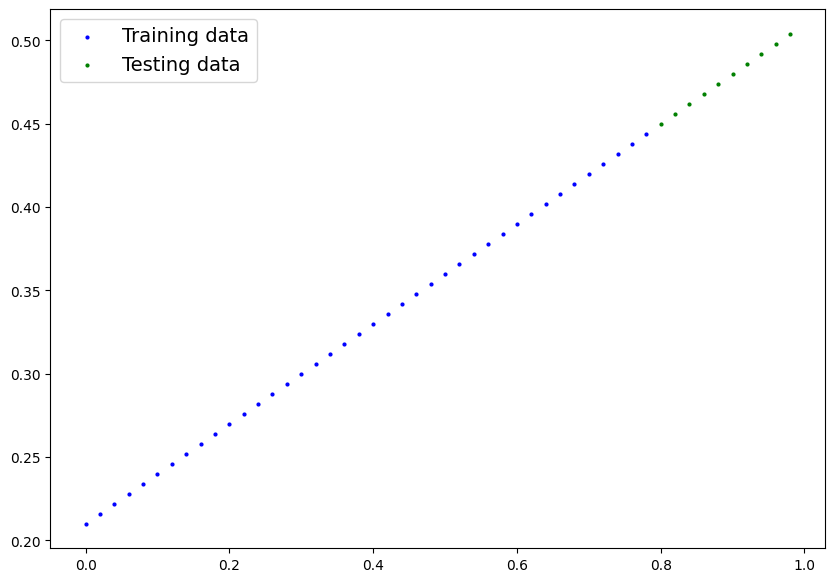

In [42]:
def plot_predictions(
    train_data=X_train, 
    train_labels=y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    predictions=None):
    
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size":14})


plot_predictions()

## 2. Build Model

What model does
* Start with random values (weight and bias)
* Look at our training data and adjust the random values to better represent (or get closer to) the ideal values (weight and bias values we used to create the data)

Two main algorithms:
1. Gradient descent
2. Backpropagation

In [34]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # Base class for all neural network models
    def __init__(self):
        super().__init__()
        # Parameter - a kind of Tensore that is to be considered a module parameter

        #random weights and bias created
        self.weights = nn.Parameter(torch.randn(
            1, #random weight
            requires_grad=True, # parameter can be updata via gradient descent
            dtype=torch.float
        ))
        self.bias =  nn.Parameter(torch.randn(
            1, 
            requires_grad=True, # requires gradient
            dtype=torch.float
        ))

    #machine learning uses forward for training and uses random weights and bias
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
        return self.weights * x + self.bias # linear regression formula
                                
    

In [48]:
#torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([-1.1229], requires_grad=True),
 Parameter containing:
 tensor([-0.1863], requires_grad=True)]

In [36]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

Check model's prediction using y_test based on X_test

In [53]:
# Make predictions with model
with torch.inference_mode(): #inference mode turns off gradiant descent tracking
    y_preds = model_0(X_test)

#plot_predictions(predictions=y_preds)
y_preds

tensor([[-1.0846],
        [-1.1071],
        [-1.1295],
        [-1.1520],
        [-1.1744],
        [-1.1969],
        [-1.2194],
        [-1.2418],
        [-1.2643],
        [-1.2867]])

In [54]:
y_preds = model_0(X_test)

y_preds

tensor([[-1.0846],
        [-1.1071],
        [-1.1295],
        [-1.1520],
        [-1.1744],
        [-1.1969],
        [-1.2194],
        [-1.2418],
        [-1.2643],
        [-1.2867]], grad_fn=<AddBackward0>)

## 3. Train model

Purpose of training is for model to move from *unknown* parametersto *known* parameters.
From poor representation to better representation.


Measure how poor models predictions are to use loss functions/cost function/criterion

Loss function: measure how wrong the model's prediction is
Optimiser: takes into account the loss of a model and adjusts the model's paremeters to improve the loss function

PyTorch need Training loop and Testing loop

In [55]:
list(model_0.parameters())

[Parameter containing:
 tensor([-1.1229], requires_grad=True),
 Parameter containing:
 tensor([-0.1863], requires_grad=True)]

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss()

# setup optimiser (stochastic gradient descent)
# lr = learning rate
optimiser = torch.optim.SGD(params=model_0.parameters(), lr=0.01)